# Outliers

An outlier is a data point that is significantly different from the remaining data.

"An outlier is an observation that deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]

## Should outliers be removed?

Depending on the context, outliers either deserve special attention or should be ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card might be a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So, in instances like these, it is useful to look for and investigate further the outlier values.

If outliers are, however, introduced by mechanical or measurement error, it is a good idea to remove these outliers before training the model. Why? because some algorithms are sensitive to outliers. 

## Machine learning models and outliers

Some machine learning models are sensitive to outliers. For instance, AdaBoost may treat outliers as "hard" cases and put tremendous weights on them, thus producing a model with poor generalisation.

Linear models, in particular linear regression, can also be sensitive to outliers.

Decision trees-based models are robust to outliers. Decision trees make decisions by asking if variable x is >= than a certain value, and therefore the outlier will fall on each side of the equation, but it will be treated similarly to non-outlier values.

A research article suggests that neural networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (> 15% as suggested in the article), then they are no longer outliers, but rather a fair representation of that variable.


## Identifying outliers

Outlier analysis and anomaly detection is a huge field of research devoted to optimising methods and creating new algorithms to reliably identify outliers. There are plenty of ways to detect outliers in different situations. These are mostly targeted to identify outliers when those are the observations that we want to focus on, for example, fraudulent credit card activity.

In this, however, we will focus on identifying outliers introduced by mechanical or measurement error.  we just want to treat them before training our models.

Here, I will show you how to identify outliers. In later Notebooks we will see how to preprocess them before training machine learning models.

## Extreme Value Analysis

The most basic form of outlier detection is **Extreme Value Analysis** of 1-dimensional data. The key to this method is to determine the statistical tails of the underlying distribution of the variable and then find the values that sit at the very end of the distribution.

- **If the variable is NORMALLY Distributed (Gaussian), then the values that lie outside the mean, plus or minus 3 times the standard deviation of the variable, are considered outliers.**

outliers = mean +/- 3* std.

- **If the variable is SKEWED, a general approach is to calculate the quantiles, and then the inter-quartile range (IQR):**

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

- Upper boundary = 75th quantile + (IQR * 3)

- Lower boundary = 25th quantile - (IQR * 3)

## In this demo

We will:

- Identify outliers using Extreme Value Analysis in Normally distributed variables.
- Identify outliers using Extreme Value Analysis in skewed variables.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# dataset for the demo
from sklearn.datasets import fetch_california_housing

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the California House price data from Scikit-learn
X, Y = fetch_california_housing(return_X_y = True, as_frame=True)

In [3]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
# Remove Latitude and Longitude
X.drop(["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [7]:
# I will transform the variables for the demo.

X['MedInc'] = np.log(X['MedInc'])

X["AveRooms"] = 1 / X["AveRooms"]

X["AveBedrms"] = 1 / X["AveBedrms"]

X["AveOccup"] = 1 / X["AveOccup"]

X['Population'] = np.log(X['Population'])

In [8]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.119287,41.0,0.143182,0.976744,5.774552,0.391304
1,2.116424,21.0,0.160304,1.028933,7.783641,0.473969
2,1.982022,52.0,0.120654,0.931579,6.206576,0.356855
3,1.730434,52.0,0.171900,0.931915,6.324359,0.392473
4,1.347086,52.0,0.159189,0.925000,6.336826,0.458407
...,...,...,...,...,...,...
20635,0.444878,25.0,0.198198,0.882353,6.739337,0.390533
20636,0.938756,18.0,0.163558,0.760000,5.874931,0.320225
20637,0.530628,17.0,0.192103,0.892784,6.914731,0.429990
20638,0.624440,18.0,0.187634,0.853301,6.608001,0.470985


## Generating a function to check How many columns in a df have unique values with names and count!!

In [9]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')

In [10]:
# A function to check How many columns in a df have unique values with names and count!! 
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup']

for feature in features:
    unique_features = X[feature].unique()
    num_features = X[feature].nunique()
    
    if num_features <= 10:
        print('{} has {} values as {}'.format(feature, num_features, unique_features))
    else:
        print('********************************************************')
        print('{} has {} values as {}.....'.format(feature, num_features, unique_features[0:10]))



********************************************************
MedInc has 12928 values as [2.11928706 2.11642418 1.98202164 1.73043356 1.34708565 1.3954523
 1.29721722 1.137833   0.73256018 1.30595161].....
********************************************************
HouseAge has 52 values as [41. 21. 52. 42. 50. 40. 49. 48. 51. 43.].....
********************************************************
AveRooms has 19392 values as [0.14318182 0.16030427 0.1206544  0.17189953 0.15918869 0.21001088
 0.20276134 0.20844072 0.23287671 0.20118343].....
********************************************************
AveBedrms has 14233 values as [0.97674419 1.02893309 0.93157895 0.93191489 0.925      0.90610329
 1.05112474 0.94177584 0.89473684 1.00990099].....
********************************************************
Population has 3888 values as [5.77455155 7.7836406  6.20657593 6.32435896 6.33682573 6.02344759
 6.99759598 7.05358573 7.09506438 7.34665516].....
*******************************************************

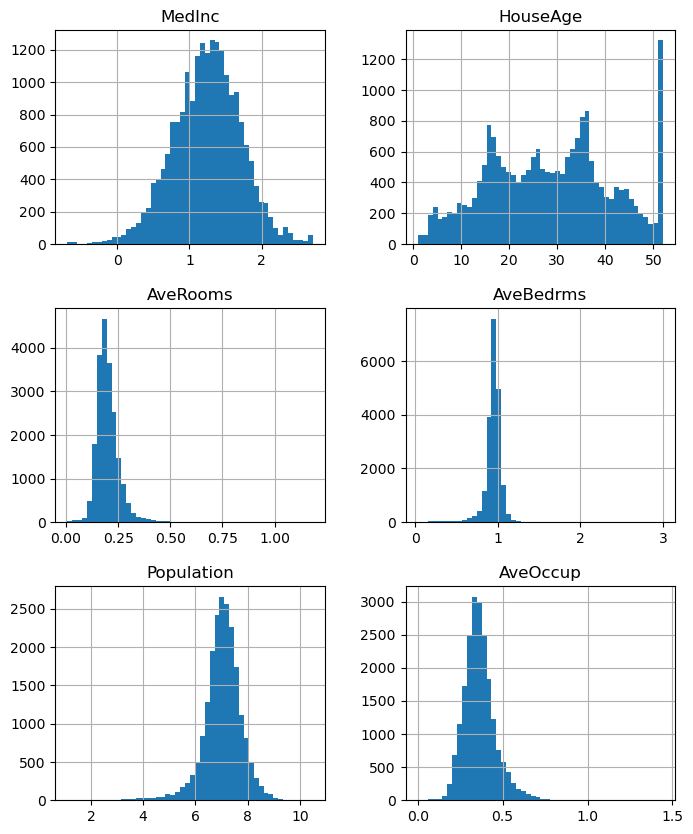

In [11]:
# Plot variable distributions:

X.hist(bins=50, figsize=(8, 10))
plt.show()

## Variable distribution

**In Normally distributed variables, outliers are those values that lie beyond the mean, plus or minus 3 times the standard deviation.**

- If the variables are skewed, however, we find outliers using the Inter-Quantile Range. In order to decide which method to use to detect outliers, we first need to know the distribution of the variable.

- **We can use HISTOGRAMS and Q-Q plots to determine if the variable is normally distributed.**
- **We can also use BOXPLOTS to directly visualise the outliers. Boxplots are a standard way of displaying the distribution of a variable, utilising the first quartile, the median, the third quartile, and the whiskers.**

Looking at a boxplot, you can easily identify:

- The median, indicated by the line within the box.

- The inter-quantile range (IQR), the box itself.

- The quantiles, the 25th (Q1) is the lower and the 75th (Q3) the upper end of the box.

- The wiskers, which extend to: 

  -- **top whisker: Q3 + 1.5 x IQR**

  -- **bottom whisker: Q1 -1.5 x IQR**

Any value sitting outside the whiskers is considered an outlier. 

Let's look at some examples below.

### Function to create a histogram, a Q-Q plot and a boxplot.

In [12]:
# Function to create a histogram, a Q-Q plot and a boxplot.


def diagnostic_plots(df, variable):
    # The function takes a dataframe (df) and the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(16, 4))

    # HISTOGRAM
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot (i.e stast.probplot( ))
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot = plt)
    plt.ylabel('RM quantiles')

    # BOXPLOT
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

**1) Plotting on "MedInc" Median Income variable**

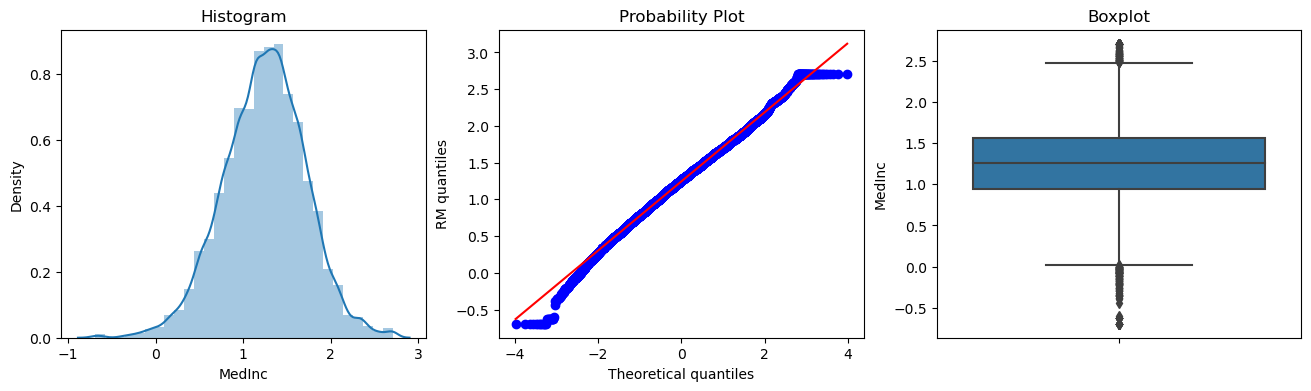

In [13]:
# Let's plot some of the variables

diagnostic_plots(X, 'MedInc')

- From the Histogram and the Q-Q plot, we see that the **variable Median income(i.e 'MedInc') shows roughly a normal distribution. The values deviate from the expected distribution towards the extremes.**

In the boxplot, we see some outliers, that is, the dots outside of the whiskers at both sides of the distribution.

**2) Plotting on "Population" variable**

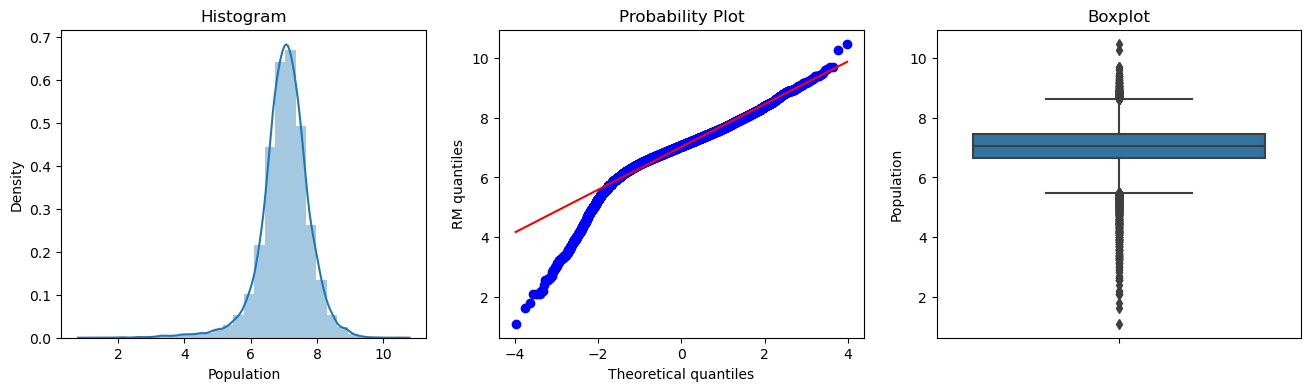

In [14]:
diagnostic_plots(X, 'Population')

- **Population is not normally distributed, and it shows outliers according to the Box-plot.**

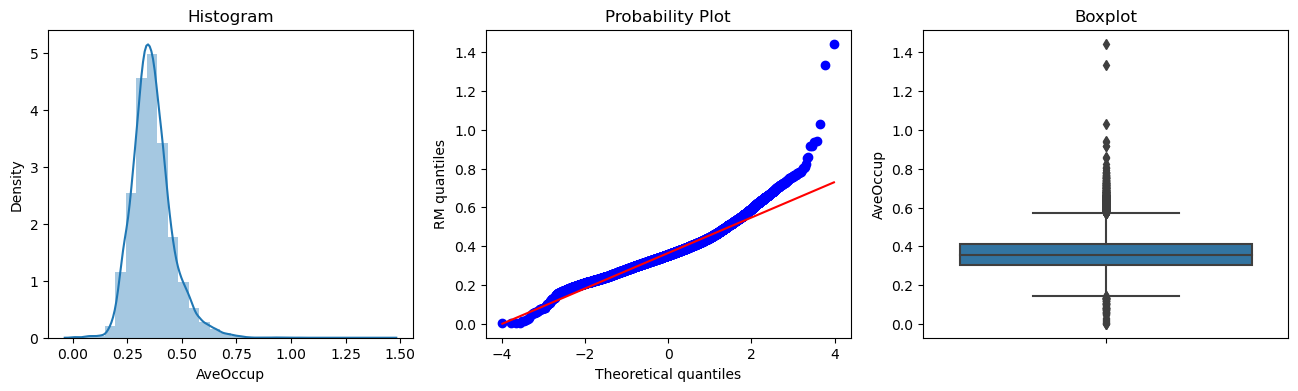

In [15]:
diagnostic_plots(X, 'AveOccup')

**Average house occupancy is not normally distributed, and it shows outliers according to the Box-plot.**

**Go ahead and plot the other variables.**

In [16]:
np.mean(X['AveOccup'])

0.36425405301597624

In [17]:
np.median(X['AveOccup'])

0.3548470407891229

If the Mean is greater than the Median, then the distribution will be Right Skewed (Positively skewed).

- **Based on the above Plots Observation, Choose the Below 2 Appropriate Methods to Detect Outliers in any respective Columns**

# Outlier detection  - Gaussian approximation for Normally distributed variables 

## If the variable is NORMALLY Distributed (Gaussian), then the values that lie outside the mean, plus or minus 3 times the standard deviation of the variable, are considered outliers.

- **outliers = mean +/- 3.stdDev**

In [18]:
# Function to find upper and lower boundaries for normally distributed variables.

def find_normal_boundaries(df, variable):

    # Calculate the boundaries for a Gaussian distribution.
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [19]:
# Assuming that MedInc is normally distributed, calculate boundaries for MedInc.

upper_boundary, lower_boundary = find_normal_boundaries(X, 'MedInc')
upper_boundary, lower_boundary

(2.656424304280744, -0.1674942963616315)

**Values bigger than 2.65 or smaller than -0.16 occur very rarely in MedInc. Therefore, we can consider them outliers.**

In [20]:
# Inspect the number and percentage of outliers in MedInc.

print('total number of houses: {}'.format(len(X)))

print('houses with right end outliers: {}'.format(
    len(X[X['MedInc'] > upper_boundary])))

print('houses with left end outliers: {}'.format(
    len(X[X['MedInc'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X[X['MedInc'] > upper_boundary]) / len(X)))

print('% left end outliers: {}'.format(
    len(X[X['MedInc'] < lower_boundary]) / len(X)))

total number of houses: 20640
houses with right end outliers: 57
houses with left end outliers: 72

% right end outliers: 0.002761627906976744
% left end outliers: 0.0034883720930232558


**Using Extreme Value Analysis we identified outliers at both ends of the distribution of MedInc. The percentage of outliers is small.**

# Outlier Detection - "Inter-quantile range Proximity rule" for Skewed variables  "Population"

## If the variable is SKEWED, a general approach is to calculate the quantiles, and then the Inter-quartile range (IQR):

- **IQR = 75th quantile - 25th quantile**

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5) && 
Lower boundary = 25th quantile - (IQR * 1.5)

- or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3) &&
Lower boundary = 25th quantile - (IQR * 3)

In [21]:
# Function to find upper and lower boundaries for skewed variables.

def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries or skewed distributions
    # The parameter "distance" gives us the option to estimate 1.5 times or 3 times the IQR when defining the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)  # Q3 - Q1
    
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)

    return upper_boundary, lower_boundary

In [22]:
# Find outliers with the IQR proximity rule.
# Here we use, IQR * 1.5, the standard metric.

upper_boundary, lower_boundary = find_skewed_boundaries(X, 'Population', 1.5)
upper_boundary, lower_boundary

(8.630113451037545, 5.491097126845318)

In [23]:
# Inspect the number and percentage of outliers in Population.

print('total number of houses: {}'.format(len(X)))

print('houses with right end outliers: {}'.format(
    len(X[X['Population'] > upper_boundary])))

print('houses with left end outliers: {}'.format(
    len(X[X['Population'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X[X['Population'] > upper_boundary]) / len(X)))

print('% left end outliers: {}'.format(
    len(X[X['Population'] < lower_boundary]) / len(X)))

total number of houses: 20640
houses with right end outliers: 230
houses with left end outliers: 617

% right end outliers: 0.011143410852713179
% left end outliers: 0.029893410852713177


**Go ahead and find the outliers in the remaning variables.**

# Using Quantiles

In [24]:
def find_boundaries(df, variable):

    # the boundaries are the quantiles
    lower_boundary = df[variable].quantile(0.05)  # Placing lower_boundary At 5th Quantile
    upper_boundary = df[variable].quantile(0.95) # Placing upper_boundary At  95th Quantile

    return upper_boundary, lower_boundary
# This function returns 5th and 95th Quantine for each variables

In [25]:
# find limits for RM

upper_boundary, lower_boundary = find_boundaries(X, 'MedInc')
upper_boundary, lower_boundary

(1.9879161280990127, 0.47035981246555514)

In [26]:
# Inspect the number and percentage of outliers in Population.

print('total number of houses: {}'.format(len(X)))

print('houses with right end outliers: {}'.format(
    len(X[X['Population'] > upper_boundary])))

print('houses with left end outliers: {}'.format(
    len(X[X['Population'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(X[X['Population'] > upper_boundary]) / len(X)))

print('% left end outliers: {}'.format(
    len(X[X['Population'] < lower_boundary]) / len(X)))

total number of houses: 20640
houses with right end outliers: 20637
houses with left end outliers: 0

% right end outliers: 0.9998546511627907
% left end outliers: 0.0
